In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [3]:
df['action'].unique()

array(['view', 'click'], dtype=object)

In [7]:
control ,experiment = df.query("action == 'click'").groupby(["group"]).apply(len)/df.groupby(["group"]).apply(len)

In [10]:
observed = experiment-control
observed

0.017919265290041758

In [11]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    c ,e = df.sample(size, replace=True).query("action == 'click'").groupby(["group"]).apply(len)/df.groupby(["group"]).apply(len)
    diffs.append(e-c)

In [14]:
# convert to numpy array
diffs = np.array(diffs)

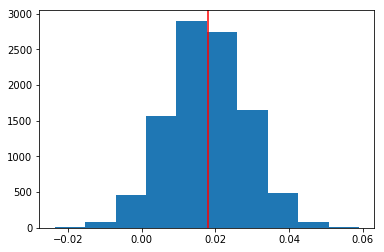

In [19]:
# plot sampling distribution
plt.hist(diffs)
plt.axvline(observed, c='red');

In [20]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

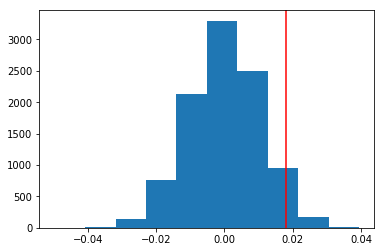

In [23]:
# plot null distribution
plt.hist(null_vals)

# plot line for observed statistic
plt.axvline(observed, c='red');

In [25]:
# compute p value
(null_vals < observed).mean()

0.95699999999999996